In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.1 MB/s eta 0:00:00


In [ ]:
!pip install qiskit_rigetti

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 13.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output

In [ ]:
pip install qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.2 MB/s eta 0:00:00


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

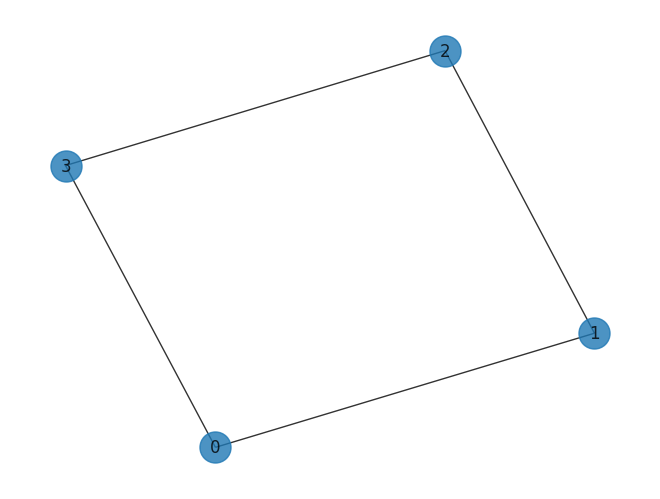

In [ ]:
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
adjacency = nx.adjacency_matrix(G).todense()

nqubits = 4

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_mix.rx(2 * beta, i)

qc_mix.draw()

┌───────────────┐
q_0: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_1: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_2: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_3: ┤ Rx(2*$\beta$) ├
     └───────────────┘

In [ ]:
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(nqubits)
for pair in list(G.edges()):  # pairs of nodes
    qc_p.rzz(2 * gamma, pair[0], pair[1])
    qc_p.barrier()

qc_p.decompose().draw()

░                              ░      »
q_0: ──■──────────────────────■───░───■──────────────────────■───░──────»
     ┌─┴─┐┌────────────────┐┌─┴─┐ ░   │                      │   ░      »
q_1: ┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───┼──────────────────────┼───░───■──»
     └───┘└────────────────┘└───┘ ░   │                      │   ░ ┌─┴─┐»
q_2: ─────────────────────────────░───┼──────────────────────┼───░─┤ X ├»
                                  ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ └───┘»
q_3: ─────────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░──────»
                                  ░ └───┘└────────────────┘└───┘ ░      »
«                             ░                              ░ 
«q_0: ────────────────────────░──────────────────────────────░─
«                             ░                              ░ 
«q_1: ────────────────────■───░──────────────────────────────░─
«     ┌────────────────┐┌─┴─┐ ░                              ░ 
«q_2: ┤ Rz(2*$\gamma$) ├┤ X ├─░───■──────────────────────■───░─
«     └────────────────┘└───┘ ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ 
«q_3: ────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░─
«                             ░ └───┘└────────────────┘└───┘ ░

In [ ]:
qc_0 = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_0.h(i)

qc_0.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘

In [ ]:
qc_qaoa = QuantumCircuit(nqubits)

qc_qaoa.append(qc_0, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_mix, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_p, [i for i in range(0, nqubits)])

qc_qaoa.decompose().decompose().draw()

┌─────────┐┌────────────────┐                             ░      »
q_0: ┤ U2(0,π) ├┤ R(2*$\beta$,0) ├──■──────────────────────■───░───■──»
     ├─────────┤├────────────────┤┌─┴─┐┌────────────────┐┌─┴─┐ ░   │  »
q_1: ┤ U2(0,π) ├┤ R(2*$\beta$,0) ├┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───┼──»
     ├─────────┤├────────────────┤└───┘└────────────────┘└───┘ ░   │  »
q_2: ┤ U2(0,π) ├┤ R(2*$\beta$,0) ├─────────────────────────────░───┼──»
     ├─────────┤├────────────────┤                             ░ ┌─┴─┐»
q_3: ┤ U2(0,π) ├┤ R(2*$\beta$,0) ├─────────────────────────────░─┤ X ├»
     └─────────┘└────────────────┘                             ░ └───┘»
«                             ░                              ░      »
«q_0: ────────────────────■───░──────────────────────────────░──────»
«                         │   ░                              ░      »
«q_1: ────────────────────┼───░───■──────────────────────■───░──────»
«                         │   ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░      »
«q_2: ────────────────────┼───░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───■──»
«     ┌────────────────┐┌─┴─┐ ░ └───┘└────────────────┘└───┘ ░ ┌─┴─┐»
«q_3: ┤ Rz(2*$\gamma$) ├┤ X ├─░──────────────────────────────░─┤ X ├»
«     └────────────────┘└───┘ ░                              ░ └───┘»
«                             ░ 
«q_0: ────────────────────────░─
«                             ░ 
«q_1: ────────────────────────░─
«                             ░ 
«q_2: ────────────────────■───░─
«     ┌────────────────┐┌─┴─┐ ░ 
«q_3: ┤ Rz(2*$\gamma$) ├┤ X ├─░─
«     └────────────────┘└───┘ ░

In [ ]:
from qiskit import IBMQ
IBMQ.save_account('1d20b86a71a646d361fb6fd55f060b5de346efa247a0d3f772195ca01759802772e0efa8992e6e58c3e3d419b9dbe9518f883ba025d266649029ef0ccc9847a6')

IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q')
#backend = provider.get_backend('ibmq_qasm_simulator')  # For a simulator
backend = provider.get_backend('ibm_kyoto')  # For an actual quantum device

configrc.store_credentials:WARNING:2023-12-04 05:50:21,779: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-12-04 05:50:22,229: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor


def maxcut_obj(x, G):
    obj = 0
    for i, j in G.edges():
        if x[i] != x[j]:
            obj -= 1

    return obj

def compute_expectation(counts, G):
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():

        obj = maxcut_obj(bitstring, G)
        avg += obj * count
        sum_count += count

    return avg/sum_count

def create_qaoa_circ(G, theta):
    nqubits = len(G.nodes())
    p = len(theta)//2  # number of alternating unitaries
    qc = QuantumCircuit(nqubits)

    beta = theta[:p]
    gamma = theta[p:]

    # initial_state
    for i in range(0, nqubits):
        qc.h(i)

    for irep in range(0, p):
        # problem unitary
        for pair in list(G.edges()):
            qc.rzz(2 * gamma[irep], pair[0], pair[1])
        # mixer unitary
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
    qc.measure_all()
    return qc

def get_expectation(G, p, shots=512):
    #backend = provider.get_backend('ibmq_qasm_simulator')  # or other backend
    backend = provider.get_backend('ibm_osaka')

    def execute_circ(theta):
        qc = create_qaoa_circ(G, theta)
        transpiled_qc = transpile(qc, backend)
        job = backend.run(transpiled_qc, shots=shots)
        job_monitor(job)  # Optional, to monitor job status
        result = job.result()
        counts = result.get_counts(qc)

        return compute_expectation(counts, G)

    return execute_circ


In [ ]:
from scipy.optimize import minimize


expectation = get_expectation(G, p=1)

res = minimize(expectation,
                      [1.0, 1.0],
                      method='COBYLA')
res

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
J

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -2.5703125
       x: [ 1.977e+00  1.200e+00]
    nfev: 33
   maxcv: 0.0

In [ ]:
from scipy.optimize import minimize

# Function to store the energy values
energy_values = []

def callback(x):
    energy = get_expectation(G, p=1)(x)
    energy_values.append(energy)

# Modify your expectation function to use the callback
expectation = get_expectation(G, p=1)

# Run the optimization
res = minimize(expectation, [1.0, 1.0], method='COBYLA', callback=callback)

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
J

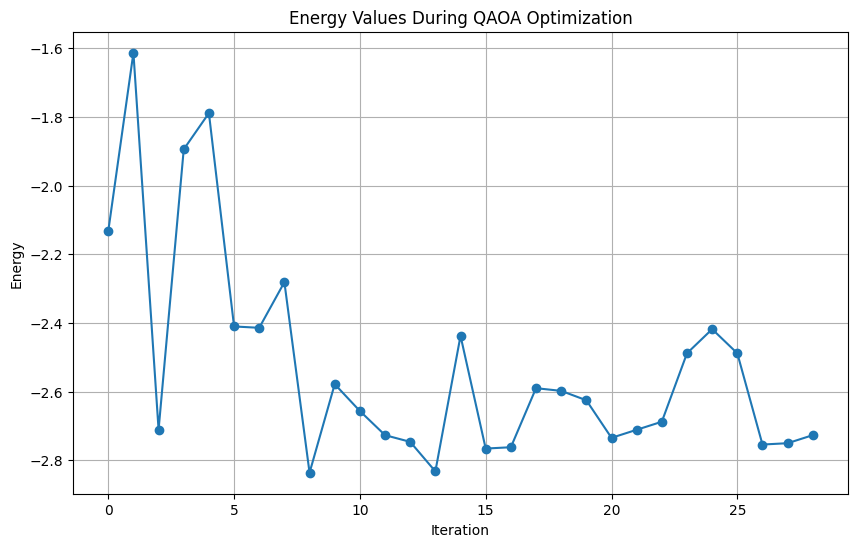

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(energy_values, marker='o')
plt.title('Energy Values During QAOA Optimization')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.grid(True)
plt.show()


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

# Assuming G and res.x are already defined
nqubits = len(G.nodes())
#backend = provider.get_backend('ibmq_qasm_simulator')  # or choose another backend
backend = provider.get_backend('ibm_osaka')

qc_res = create_qaoa_circ(G, res.x)
transpiled_qc_res = transpile(qc_res, backend)

job = backend.run(transpiled_qc_res, shots=512)
job_monitor(job)  # Optional, to see the job's progress
result = job.result()
counts = result.get_counts(qc_res)

plot_histogram(counts)


IBMQBackendApiError: ignored

In [ ]:
provider = IBMQ.get_provider(hub='ibm-q')
kyoto = provider.get_backend('ibm_kyoto')
osaka = provider.get_backend('ibm_osaka')
brisbane = provider.get_backend('ibm_brisbane')

print(f"Kyoto status: {kyoto.status().to_dict()}")
print(f"Osaka status: {osaka.status().to_dict()}")
print(f"Brisbane status: {brisbane.status().to_dict()}")

Kyoto status: {'backend_name': 'ibm_kyoto', 'backend_version': '1.2.0', 'operational': True, 'pending_jobs': 34, 'status_msg': 'active'}
Osaka status: {'backend_name': 'ibm_osaka', 'backend_version': '1.0.0', 'operational': True, 'pending_jobs': 22, 'status_msg': 'active'}
Brisbane status: {'backend_name': 'ibm_brisbane', 'backend_version': '1.1.13', 'operational': True, 'pending_jobs': 262, 'status_msg': 'active'}


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Define the range for the parameters (angles)
beta_range = np.linspace(0, np.pi, 20)
gamma_range = np.linspace(0, 2*np.pi, 20)

# Prepare a grid for the parameters and energy values
beta_grid, gamma_grid = np.meshgrid(beta_range, gamma_range)
energy_landscape = np.zeros(beta_grid.shape)

# Compute the energy for each combination of beta and gamma
for i in range(beta_grid.shape[0]):
    for j in range(gamma_grid.shape[1]):
        theta = [beta_grid[i, j], gamma_grid[i, j]]
        energy = get_expectation(G, p=1)(theta)
        energy_landscape[i, j] = energy

# Create the plot
fig = go.Figure(data=[go.Surface(z=energy_landscape, x=beta_grid, y=gamma_grid)])
fig.update_layout(title='QAOA Energy Landscape', autosize=False,
                  width=800, height=800, margin=dict(l=65, r=50, b=65, t=90),
                  scene=dict(xaxis_title='Beta', yaxis_title='Gamma', zaxis_title='Energy'))

fig.show()


IBMQBackendApiError: ignored

In [ ]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibm_osaka')

# Print basic properties of the backend
print(f"Backend: {backend.name()}")
print(f"Number of Qubits: {backend.configuration().n_qubits}")
print(f"Quantum Volume: {backend.configuration().quantum_volume}")
print(f"Simulator: {backend.configuration().simulator}")
print(f"Backend Status: {backend.status().operational}")

Backend: ibm_osaka
Number of Qubits: 127
Quantum Volume: None
Simulator: False
Backend Status: True


In [ ]:
import plotly